In [1]:
#Data science with python
# Application of data science

#step 1: import necesssary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the bse_data dataset

df = pd.read_csv('bse_data.csv')

In [3]:
#checing for duplicates 
print(df.duplicated().sum())

0


In [4]:
#check for empty cell
print(df.isnull().sum())

number_siblings     0
name                0
gender              0
age                 0
living_allowance    7
have_bf_gf          0
profession          0
daily_meals         0
dtype: int64


In [5]:
#check for wrong data
print(df['have_bf_gf'].unique())

[1 0]


In [6]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('bse_data.csv')

# Remove commas and convert to numeric
data['living_allowance'] = data['living_allowance'].str.replace(',', '')
data['living_allowance'] = pd.to_numeric(data['living_allowance'], errors='coerce')

# Calculate the median of the living_allowance column
median_value = data['living_allowance'].median()

# Fill NaN values with the median
data['living_allowance'].fillna(median_value, inplace=True)

# Print the first 8 rows of the dataframe
print(data.head(8))


   number_siblings                      name  gender  age  living_allowance  \
0                1        Nakasujja Gertrude  female   33          200000.0   
1                3     Arinda Asiimwe Atweta  female   23           50000.0   
2                4       Ndjekornom Victoire    male   23           25000.0   
3                0            KATURAMU EDGAR    male   27          500000.0   
4                4         Abinsinguza Lasse    male   24          100000.0   
5                4       Beingana Jim Junior    male   20           10000.0   
6                6  Cyiza Ndoli Jean de Dieu    male   23           60000.0   
7                8       MUSIIMENTA CISSYLYN  female   20          260000.0   

   have_bf_gf                profession  daily_meals  
0           1            Data Scientist            2  
1           1  Machine Learning Enginer            1  
2           0            Data Scientist            1  
3           0  Machine Learning Enginer            2  
4           1

/tmp/ipykernel_618611/264545610.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['living_allowance'].fillna(median_value, inplace=True)


In [11]:
df1 = pd.read_csv('crop.csv')
print(df1.to_string())

        N    P    K  temperature   humidity        ph    rainfall        label
0      90   42   43    20.879744  82.002744  6.502985  202.935536         rice
1      85   58   41    21.770462  80.319644  7.038096  226.655537         rice
2      60   55   44    23.004459  82.320763  7.840207  263.964248         rice
3      74   35   40    26.491096  80.158363  6.980401  242.864034         rice
4      78   42   42    20.130175  81.604873  7.628473  262.717340         rice
5      69   37   42    23.058049  83.370118  7.073454  251.055000         rice
6      69   55   38    22.708838  82.639414  5.700806  271.324860         rice
7      94   53   40    20.277744  82.894086  5.718627  241.974195         rice
8      89   54   38    24.515881  83.535216  6.685346  230.446236         rice
9      68   58   38    23.223974  83.033227  6.336254  221.209196         rice
10     91   53   40    26.527235  81.417538  5.386168  264.614870         rice
11     90   46   42    23.978982  81.450616  7.50283

In [12]:
#data claeaning //preprocessing
print(df1.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


<Axes: >

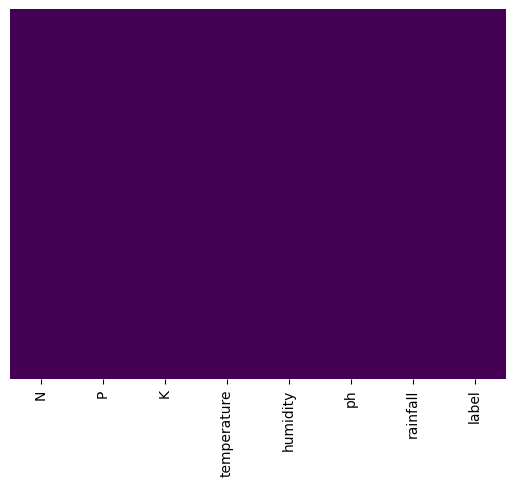

In [13]:
# check for null / missing values using heatmap

sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap='viridis')

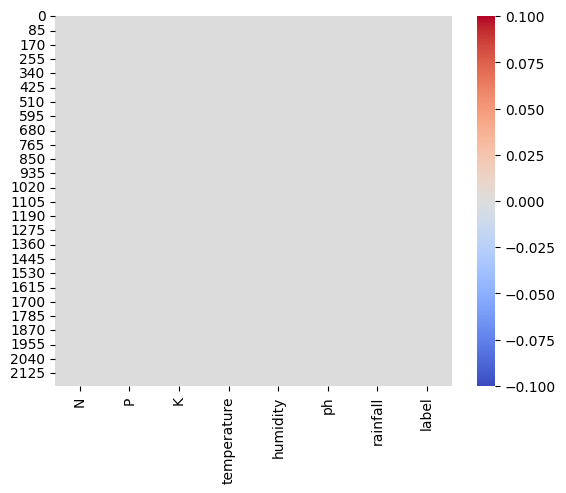

In [14]:
#method 2
sns.heatmap(df1.isnull(),cmap='coolwarm')
plt.show()


In [15]:
# Distribution of temperature and ph
print(df1['temperature'].value_counts())

temperature
23.603016    1
20.879744    1
21.770462    1
23.004459    1
26.491096    1
            ..
26.800796    1
23.978982    1
26.527235    1
23.223974    1
24.515881    1
Name: count, Length: 2200, dtype: int64


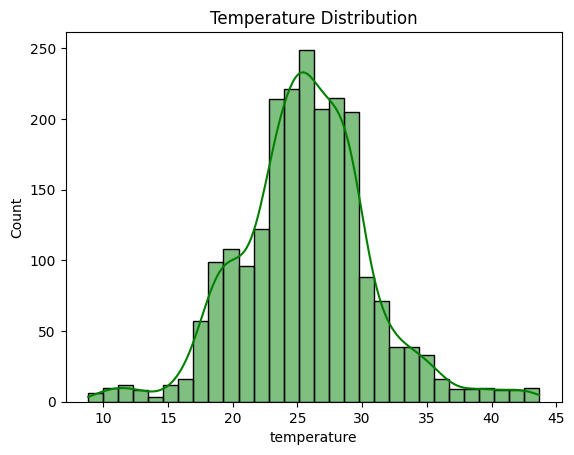

In [16]:
# Method 
sns.histplot(df1['temperature'], color='green', bins=30,  kde=True)
plt.title('Temperature Distribution')
plt.show()

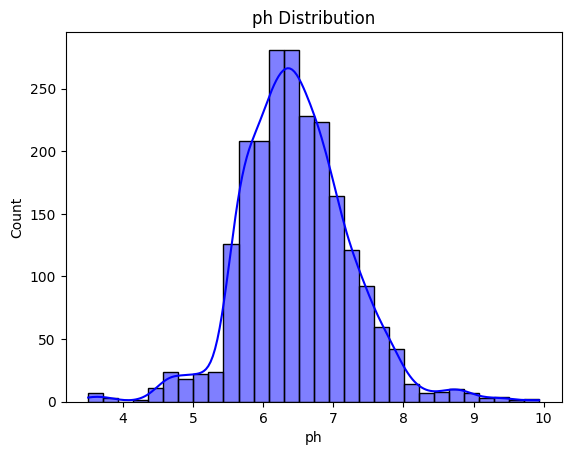

In [17]:
# Method 
sns.histplot(df1['ph'], color='blue', bins=30,  kde=True)
plt.title('ph Distribution')
plt.show()

/tmp/ipykernel_618611/1807019345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=df1, palette='plasma_r')


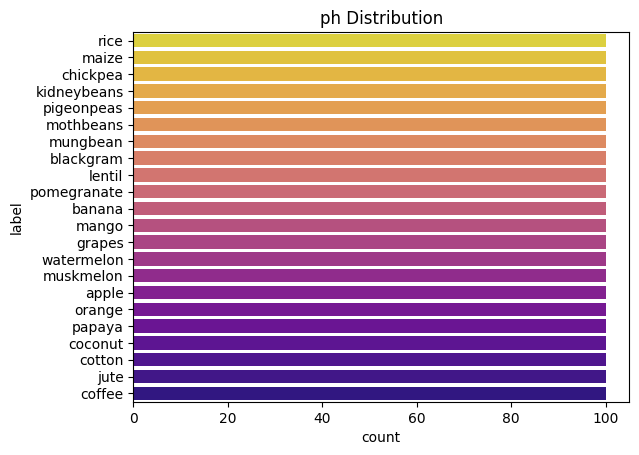

In [18]:
# Check if the dataset is balanced or not
sns.countplot(y='label', data=df1, palette='plasma_r')
plt.title('ph Distribution')
plt.show()

/tmp/ipykernel_618611/2004412223.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='label', x='ph', data=df1, palette='plasma_r')


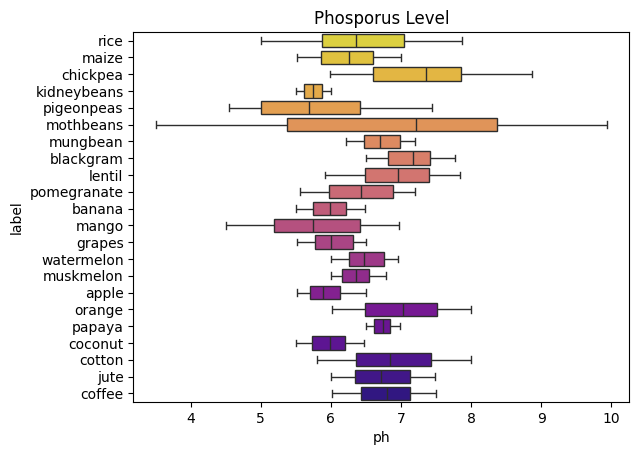

In [19]:
# phosphorus level
sns.boxplot(y='label', x='ph', data=df1, palette='plasma_r')
plt.title('Phosporus Level')
plt.show()

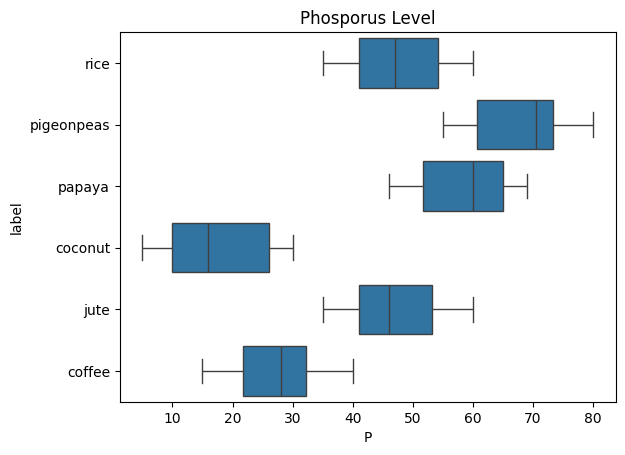

In [20]:
# phosphorus level basing on rainfall
sns.boxplot(y='label', x='P', data=df1[df1['rainfall']>150 ])
plt.title('Phosporus Level')
plt.show()

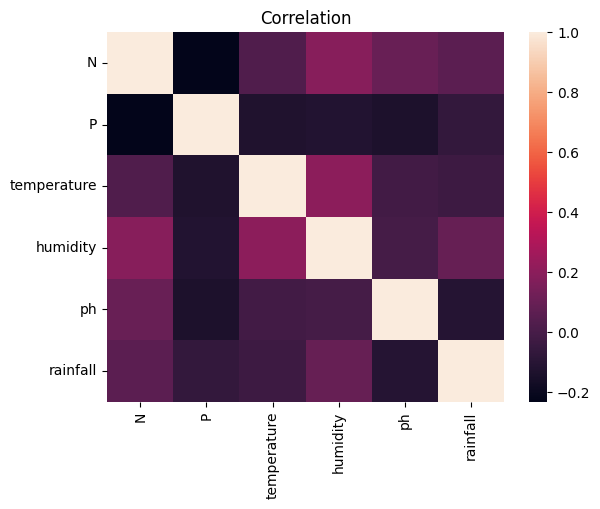

In [21]:
# Correlation, relationship between columns
c =df1.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df1['target'] = c.cat.codes

y = df1.target
X = df1[['N', 'P', 'temperature','humidity','ph','rainfall']]

sns.heatmap(X.corr())
plt.title("Correlation")
plt.show()